In [1]:
from __future__ import division

import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Perceptron

# Least Mean Squares

In [2]:
def my_LMS(X, y, maxiter=10):
    """
    Least Mean Squares algorithm.
    
    Inputs:
        X (array-like) - 2D array of training features
        y (array-like) - 1D array of target values
    Outputs:
        w (array-like) - array of coefficients
    """
    
    index = np.arange(X.shape[0])
    
    w0 = np.ones(X.shape[1])
    for k in xrange(maxiter):
        nk = 1 / (1+k)
        w1 = w0.copy()

        np.random.shuffle(index)
        for i in index:
            x = X[i]
            g = x*(w1.dot(x) - y[i])
            g = g / la.norm(g)
            w1 -= nk*g
    
        diff = la.norm(w1 - w0)
        if diff < 10**-5:
            return w1
    
        w0 = w1.copy()
    return w1

In [3]:
def my_OLS(X,y):
    """
    Ordinary Least Squares algorithm.
    
    Inputs:
        X (array-like) - 2D array of training features
        y (array-like) - 1D array of target values
    Outputs:
        w (array-like) - array of coefficients
    """
    Q,R = np.linalg.qr(X)
    return la.solve(R.T.dot(R), X.T.dot(y))

## Comparision of Least Mean Squares and Ordinary Least Squares

### Coefficients

In [4]:
# Contrived linear regression dataset
X, y = datasets.make_regression(n_samples=2000, n_features=2, noise=4, bias=150)
X = np.hstack((X, np.ones((X.shape[0],1))))

print "LMS coef:", my_LMS(X,y)
print "OLS coef:", my_OLS(X,y)

LMS coef: [  44.43146487   52.14487703  149.53886351]
OLS coef: [  43.94478748   52.25177557  149.96184256]


### Timing

In [5]:
%time w = my_LMS(X,y)

CPU times: user 296 ms, sys: 4 ms, total: 300 ms
Wall time: 297 ms


In [6]:
%time w = my_OLS(X,y)

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 655 µs


# Perceptron

In [7]:
def my_perceptron(X, y, maxiter=1000):
    """ 
    Vanilla implementation of a perceptron.
    
    Inputs:
        X (array-like) : 2D array of features
        y (array-like) : 1D array of target labels {-1,1}
        maxiter (int, optional) : maximum number of iterations.
            Defaults to 1000.
    Returns:
        w (array) : coefficients of linear decision boundary
    """
    w0 = np.ones(X.shape[1])
    N = X.shape[0]
    c=0
    for k in xrange(maxiter):
        w1 = w0.copy()
        i = k % N
        x = X[i]
        
        if np.sign(w1.dot(x)) != y[i]:
            w1 += y[i]*x
            c = 0
        else:
            c+=1
        
        if c > X.shape[0]:
            return w1
        
        w0 = w1.copy()
    return w1

## Comparison of My Perceptron and Sci-kit's Perceptron

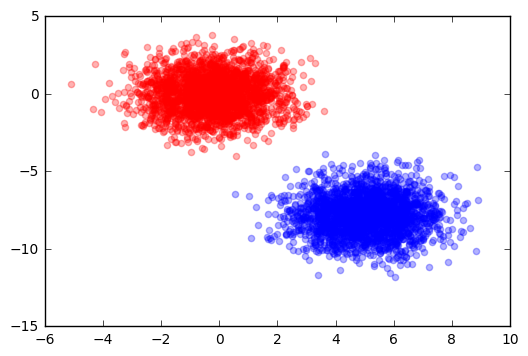

In [8]:
# Contrived linearly-separable dataset
X,y = datasets.make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=1.2, random_state=3333)
X = np.hstack((X, np.ones((X.shape[0],1))))
y = 2*y - 1

plt.scatter(X[y==1,0], X[y==1,1], color='red', alpha=.3)
plt.scatter(X[y==-1,0], X[y==-1,1], color='blue', alpha=.3)
plt.show()

### Coefficients

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=.7)

my_w = my_perceptron(X,y)
my_acc = (np.sign(my_w.dot(Xtest.T))==ytest).mean()

per = Perceptron().fit(X,y)
sk_w = per.coef_[0]
sk_acc = (np.sign(sk_w.dot(Xtest.T))==ytest).mean()

print "My Perceptron coef :\t\t", my_w
print "Sci-kit's Perceptron coef :\t", sk_w

My Perceptron coef :		[-1.3576851   1.15240562  6.        ]
Sci-kit's Perceptron coef :	[-2.0294481   1.82735408  5.        ]


### Accuracy

In [10]:
print "My Accuracy :\t\t", my_acc
print "Sci-kit's Accuracy :\t", sk_acc

My Accuracy :		1.0
Sci-kit's Accuracy :	0.976


### Timing

In [11]:
%timeit w = my_perceptron(X,y)

100 loops, best of 3: 2.29 ms per loop


In [12]:
%timeit w = Perceptron().fit(X,y).coef_

1000 loops, best of 3: 1.33 ms per loop
